<a href="https://colab.research.google.com/github/raaghaveramireddy/LLM-/blob/main/bonus_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Enter character and frequency pairs (e.g., A 5, B 9, C 12): A 19,k 7,r 30

Huffman Codes for each character:
Character: 'k' | Huffman Code: 00
Character: 'a' | Huffman Code: 01
Character: 'r' | Huffman Code: 1




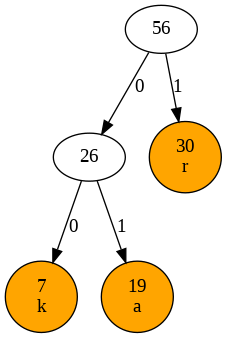

In [11]:
import heapq
from graphviz import Digraph
from IPython.display import Image

class Fre:
    def __init__(self, r, cha=None):
        self.r = r
        self.cha = cha
        self.v = None
        self.t = None

    def __lt__(self, k):
        if self.r == k.r:
            return self.cha < k.cha
        return self.r < k.r

def huff(tr3):
    k = [Fre(r, cha) for cha, r in tr3.items()]
    heapq.heapify(k)

    while len(k) > 1:
        v = heapq.heappop(k)
        t = heapq.heappop(k)
        rv = Fre(v.r + t.r)
        rv.v = v
        rv.t = t
        heapq.heappush(k, rv)

    s = k[0]
    b = {}
    _generate_codes(s, "", b)

    # Generate tree visualization
    kr = Digraph()
    _build_tree_graph(kr, s)
    kr.render("huffman_tree", format="png", cleanup=True)  # Save and render tree as an image
    return b

def _generate_codes(a, current_code, b):
    if a is not None:
        if a.cha:
            b[a.cha] = current_code
        _generate_codes(a.v, current_code + "0", b)
        _generate_codes(a.t, current_code + "1", b)

def _build_tree_graph(kr, a, parent_id=None, edge_label=""):
    # Create a unique ID for each node
    node_id = str(id(a))
    if a.cha:
        # Leaf node (character node)
        label = f"{a.r}\n{a.cha}"
        kr.node(node_id, label=label, style="filled", fillcolor="orange")
    else:
        # Internal node
        label = f"{a.r}"
        kr.node(node_id, label=label)
    if parent_id:
        kr.edge(parent_id, node_id, label=edge_label)
    # Recursively create nodes for children
    if a.v:
        _build_tree_graph(kr, a.v, node_id, "0")
    if a.t:
        _build_tree_graph(kr, a.t, node_id, "1")

# Example usage
input_data = input("Enter character and frequency pairs (e.g., A 5, B 9, C 12): ")
tr3 = {}
for item in input_data.split(","):
    item = item.strip()
    if item:
        try:
            cha, r = item.split()
            cha = cha.lower()
            tr3[cha] = tr3.get(cha, 0) + int(r)
        except ValueError:
            print(f"Invalid input format for '{item}'. Skipping.")

if tr3:
    huffman_codes = huff(tr3)
    print("\nHuffman Codes for each character:")
    for cha, code in huffman_codes.items():
        print(f"Character: '{cha}' | Huffman Code: {code}")
    print("\n")
    # Display the generated Huffman Tree image
    display(Image(filename="huffman_tree.png", width=400, height=500))
else:
    print("No valid character-frequency pairs were provided.")
